<a href="https://colab.research.google.com/github/VindaShinde/ML-basic_Models/blob/main/KMeans_ClusterringUsingIncomeSpent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clusterring Using Income Spent

## Importing the basic libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage, dendrogram

### Load Dataset from Local Directory

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset_KMeans.csv to dataset_KMeans.csv


## Importing the dataset

In [3]:
dataset = pd.read_csv('dataset_KMeans.csv')

### Summarize Dataset

In [4]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head(5))

(303, 2)
           INCOME       SPEND
count  303.000000  303.000000
mean   245.273927  149.646865
std     48.499412   22.905161
min    126.000000   71.000000
25%    211.000000  133.500000
50%    240.000000  153.000000
75%    274.000000  166.000000
max    417.000000  202.000000
   INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163


### Segregate & Zipping Dataset

In [5]:
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values

X = np.array(list(zip(Income, Spend)))



Text(0, 0.5, 'Spend')

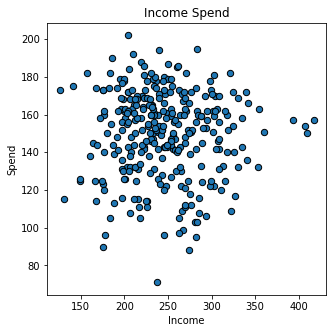

In [6]:
fig = plt.figure(figsize=(5,5))
plt.scatter(Income,Spend, edgecolor = 'black', s = 40 )
plt.title("Income Spend")
plt.xlabel("Income")
plt.ylabel("Spend")

# Random Centroids

In [7]:
centroid1 = np.array([200,165])
centroid2 = np.array([250,156])
centroid3 = np.array([300, 135])
print(centroid1, centroid2, centroid3)

[200 165] [250 156] [300 135]


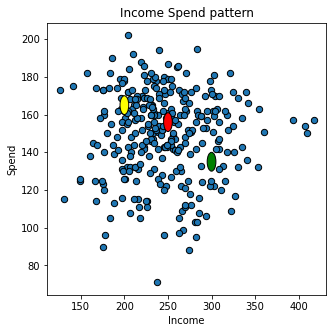

In [8]:
fig = plt.figure(figsize=(5,5))

plt.scatter(Income, Spend, edgecolor = 'black', s = 40)
plt.title('Income Spend pattern')
plt.xlabel('Income')
plt.ylabel('Spend')
circle1 = plt.Circle(centroid1, radius=5, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=5, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=5, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

### First Iteration


In [9]:
dataset["Dist1"] = np.sqrt((Income-centroid1[0])**2 + (Spend-centroid1[1])**2)
dataset["Dist2"] = np.sqrt((Income-centroid2[0])**2 + (Spend-centroid2[1])**2)
dataset["Dist3"] = np.sqrt((Income-centroid3[0])**2 + (Spend-centroid3[1])**2)
dataset.head()

,INCOME,SPEND,Dist1,Dist2,Dist3
0,233,150,36.249138,18.027756,68.658576
1,250,187,54.626001,31.000000,72.138755
2,204,172,8.062258,48.703183,102.883429
3,236,178,38.275318,26.076810,77.103826
4,354,163,154.012986,104.235311,60.827625


### Associating Points to Centroids

In [10]:
dataset["Association"] = np.where(
    (dataset.Dist1 < dataset.Dist2) &
    (dataset.Dist1 < dataset.Dist3), 1,
    np.where((dataset.Dist2 < dataset.Dist1) &
             (dataset.Dist2 < dataset.Dist3), 2, 3))
dataset.head()

,INCOME,SPEND,Dist1,Dist2,Dist3,Association
0,233,150,36.249138,18.027756,68.658576,2
1,250,187,54.626001,31.000000,72.138755,2
2,204,172,8.062258,48.703183,102.883429,1
3,236,178,38.275318,26.076810,77.103826,2
4,354,163,154.012986,104.235311,60.827625,3


### Result of First Iteration

Text(0, 0.5, 'Spend')

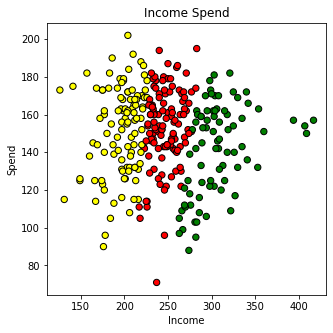

In [11]:
fig = plt.figure(figsize=(5,5))

# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])

plt.scatter(Income,Spend, c = colormap[dataset.Association], edgecolor = 'black', s = 40 )
plt.title("Income Spend")
plt.xlabel("Income")
plt.ylabel("Spend")

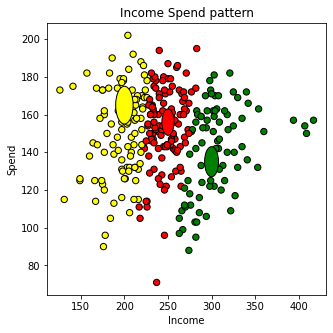

In [12]:
fig = plt.figure(figsize=(5,5))

# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])

plt.scatter(Income, Spend,c=colormap[dataset.Association], edgecolor = 'black', s = 40)
plt.title('Income Spend pattern')
plt.xlabel('Income')
plt.ylabel('Spend')
circle1 = plt.Circle(centroid1, radius=10, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=7, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=8, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

# Second Iterartion

### Recentering Centroids


In [22]:
centroid1 = dataset[dataset.Association==1][["INCOME","SPEND"]].mean()
centroid2 = dataset[dataset.Association==2][["INCOME","SPEND"]].mean()
centroid3 = dataset[dataset.Association==3][["INCOME","SPEND"]].mean()

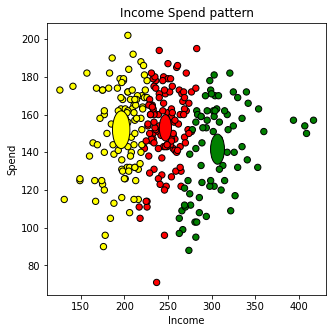

In [23]:
fig = plt.figure(figsize=(5,5))

# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])

plt.scatter(Income, Spend,c=colormap[dataset.Association], edgecolor = 'black', s = 40)
plt.title('Income Spend pattern')
plt.xlabel('Income')
plt.ylabel('Spend')
circle1 = plt.Circle(centroid1, radius=10, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=7, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=8, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

### Calculating Distances and Association for 2nd Iteration

In [24]:
dataset["Dist1"] = np.sqrt((Income-centroid1[0])**2 + (Spend-centroid1[1])**2)
dataset["Dist2"] = np.sqrt((Income-centroid2[0])**2 + (Spend-centroid2[1])**2)
dataset["Dist3"] = np.sqrt((Income-centroid3[0])**2 + (Spend-centroid3[1])**2)

dataset["Association"] = np.where(
    (dataset.Dist1 < dataset.Dist2) &
    (dataset.Dist1 < dataset.Dist3), 1,
    np.where((dataset.Dist2 < dataset.Dist1) &
             (dataset.Dist2 < dataset.Dist3), 2, 3))

### Result of Third iterarion

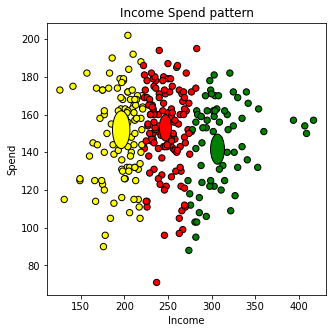

In [25]:
fig = plt.figure(figsize=(5,5))

# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])

plt.scatter(Income, Spend,c=colormap[dataset.Association], edgecolor = 'black', s = 40)
plt.title('Income Spend pattern')
plt.xlabel('Income')
plt.ylabel('Spend')
circle1 = plt.Circle(centroid1, radius=10, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=7, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=8, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

# Third iterartion

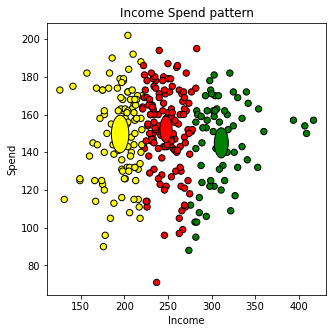

In [26]:
centroid1 = dataset[dataset.Association==1][["INCOME","SPEND"]].mean()
centroid2 = dataset[dataset.Association==2][["INCOME","SPEND"]].mean()
centroid3 = dataset[dataset.Association==3][["INCOME","SPEND"]].mean()

dataset["Dist1"] = np.sqrt((Income-centroid1[0])**2 + (Spend-centroid1[1])**2)
dataset["Dist2"] = np.sqrt((Income-centroid2[0])**2 + (Spend-centroid2[1])**2)
dataset["Dist3"] = np.sqrt((Income-centroid3[0])**2 + (Spend-centroid3[1])**2)

dataset["Association"] = np.where(
    (dataset.Dist1 < dataset.Dist2) &
    (dataset.Dist1 < dataset.Dist3), 1,
    np.where((dataset.Dist2 < dataset.Dist1) &
             (dataset.Dist2 < dataset.Dist3), 2, 3))

fig = plt.figure(figsize=(5,5))

# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'green'])

plt.scatter(Income, Spend,c=colormap[dataset.Association], edgecolor = 'black', s = 40)
plt.title('Income Spend pattern')
plt.xlabel('Income')
plt.ylabel('Spend')
circle1 = plt.Circle(centroid1, radius=10, edgecolor = 'black', fc='yellow')
circle2 = plt.Circle(centroid2, radius=7, edgecolor = 'black', fc='red')
circle3 = plt.Circle(centroid3, radius=8, edgecolor = 'black', fc='green')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

# Finding the Optimized K Value using KMeanse function

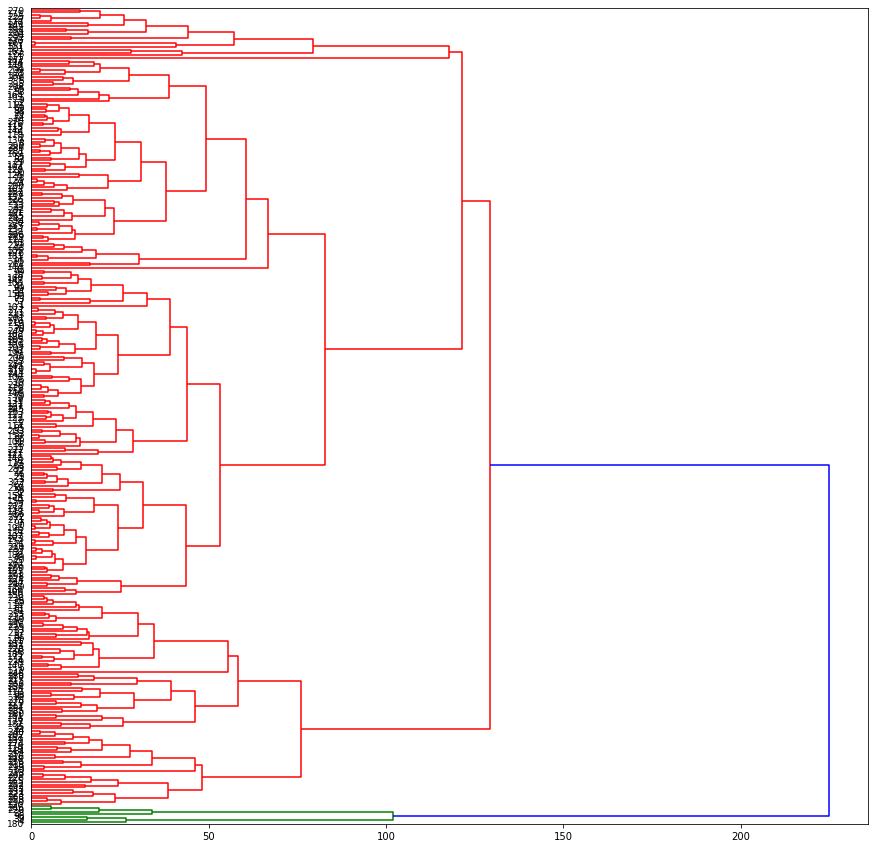

In [33]:
Z = linkage(dataset,'average')
plt.figure(figsize=(15, 15))
D = dendrogram(Z=Z,orientation="right", leaf_font_size=9, labels = dataset.index)

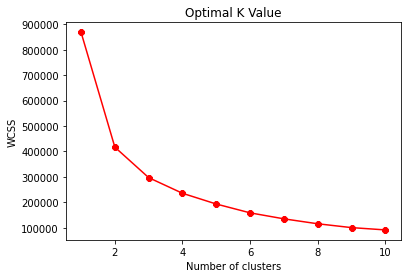

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,color="red", marker ="8")
plt.title('Optimal K Value')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Fitting the k-means to the dataset with k=4
Lower y and lower x is best cluster

In [46]:
model=KMeans(n_clusters=4, random_state=0)
model1=KMeans(n_clusters=5, random_state=0) ## By Dana's method
y_means = model.fit_predict(X)
model1.fit(X)
model1.labels_ ## By Dana's method

array([1, 1, 0, 1, 4, 0, 4, 1, 0, 0, 1, 3, 1, 2, 1, 0, 4, 2, 1, 1, 1, 1,
       0, 1, 0, 4, 0, 2, 4, 0, 0, 2, 0, 1, 2, 0, 4, 1, 1, 4, 4, 1, 0, 1,
       4, 4, 1, 1, 2, 1, 1, 4, 1, 0, 1, 0, 0, 1, 0, 4, 3, 4, 0, 2, 0, 0,
       2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 4, 4, 4, 3, 1, 1, 0,
       0, 3, 1, 0, 0, 4, 2, 2, 4, 1, 4, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1,
       4, 0, 4, 0, 1, 0, 0, 0, 0, 1, 3, 1, 1, 1, 0, 0, 2, 1, 0, 3, 0, 1,
       4, 1, 4, 1, 2, 2, 2, 3, 4, 4, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1,
       0, 2, 1, 0, 2, 0, 1, 4, 0, 0, 0, 3, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2,
       1, 4, 2, 3, 4, 2, 4, 1, 3, 4, 1, 3, 1, 0, 4, 2, 2, 3, 0, 4, 1, 1,
       3, 1, 0, 1, 3, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 4, 1, 4, 3, 4, 3, 1,
       4, 2, 1, 3, 3, 2, 3, 2, 4, 4, 1, 3, 4, 3, 4, 4, 4, 4, 4, 1, 3, 1,
       2, 3, 2, 1, 4, 3, 1, 1, 3, 1, 3, 3, 3, 4, 3, 2, 1, 1, 1, 1, 3, 1,
       2, 2, 4, 2, 3, 3, 1, 1, 3, 1, 3, 0, 2, 1, 4, 2, 4, 0, 2, 0, 2, 4,
       0, 1, 4, 2, 0, 4, 1, 0, 2, 2, 2, 2, 3, 3, 2,

### Visualizing the clusters for k=4

Cluster 1: Customers with medium income and low spend

Cluster 2: Customers with high income and medium to high spend

Cluster 3: Customers with low income

Cluster 4: Customers with medium income but high spend

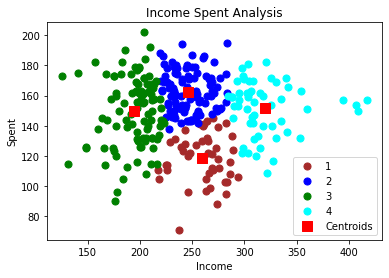

In [15]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='brown',label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='4')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='red', label='Centroids')
plt.title('Income Spent Analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()

# Prediction Mesh

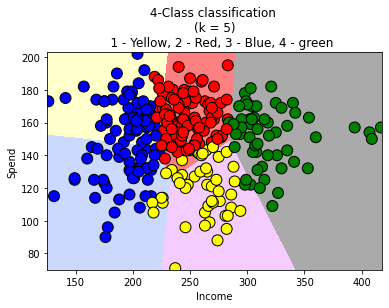

In [47]:
def plotMesh():
    h = 0.1
    # Create color maps
    cmap_light = ListedColormap(['#ffffcc', '#ff8080','#ccd9ff','#f5ccff','#aaaaaa'])
    colormap = np.array(['yellow', 'red', 'blue','green','black'])

    x_min, x_max = dataset.INCOME.min() - 1, dataset.INCOME.max() + 1
    y_min, y_max = dataset.SPEND.min() - 1, dataset.SPEND.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Plot also the training points
    plt.scatter(dataset.INCOME, dataset.SPEND, c = colormap[model.labels_], edgecolor = 'black', s = 120)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("4-Class classification \n(k = %i)\n\
    1 - Yellow, 2 - Red, 3 - Blue, 4 - green" % (5))
    plt.xlabel('Income')
    plt.ylabel('Spend')
plotMesh()

# Prediction

In [48]:
colormap = np.array(['yellow', 'red', 'blue','magenta','black'])

Income = float(input('Enter Income : '))
Spend = float(input('Enter Spend : '))
data_class = model1.predict(np.array([Income, Spend]).reshape(1, -1))[0]
colormap[data_class]

Enter Income : 280
Enter Spend : 356


'red'